# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


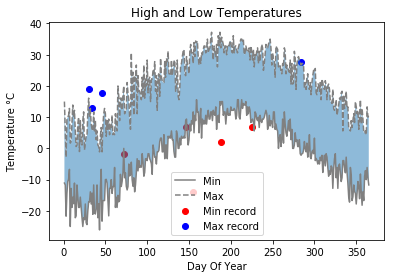

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

# extract day of year from datetime object
df["Date"] = pd.to_datetime(df["Date"])
df = df.drop_duplicates("Date")
df = df.sort_values("Date")
df["Data_Value"] = df["Data_Value"]/10
df["Day_of_Year"] = df["Date"].dt.dayofyear
df = df[df["Day_of_Year"] != 366]

df1 = df[df["Date"] < "2015"]
df2 = df[df["Date"] >= "2015"]

# extract the max of max and min of min tempratures
TMIN_df1 = df1[df1["Element"] == "TMIN"]
TMIN_df1 = TMIN_df1.groupby("Day_of_Year")["Data_Value"].min()
TMAX_df1 = df1[df1["Element"] == "TMAX"]
TMAX_df1 = TMAX_df1.groupby("Day_of_Year")["Data_Value"].max()

TMIN_x1 = TMIN_df1.index.tolist()
TMIN_y1 = TMIN_df1.values.tolist()
TMAX_x1 = TMAX_df1.index.tolist()
TMAX_y1 = TMAX_df1.values.tolist()

TMIN_df2 = df2[df2["Data_Value"].lt(TMIN_df1)]["Data_Value"]
TMAX_df2 = df2[df2["Data_Value"].gt(TMAX_df1)]["Data_Value"]

TMIN_x2 = TMIN_df2.index.tolist()
TMIN_y2 = TMIN_df2.values.tolist()
TMAX_x2 = TMAX_df2.index.tolist()
TMAX_y2 = TMAX_df2.values.tolist()

# plot the graph
plt.figure()
plt.plot(TMIN_x1, TMIN_y1, color="gray", label="Min")
plt.plot(TMAX_x1, TMAX_y1, color="gray", linestyle="--", label="Max")
plt.scatter(TMIN_x2, TMIN_y2, color="red", label="Min record")
plt.scatter(TMAX_x2, TMAX_y2, color="blue", label="Max record")
plt.xlabel("Day Of Year")
plt.ylabel("Temperature °C")
plt.title("High and Low Temperatures")
plt.legend()
plt.fill_between(TMIN_x1, TMIN_y1, TMAX_y1, alpha=0.5)
plt.show()

In [63]:
# load data
df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

# extract day of year from datetime object
df["Date"] = pd.to_datetime(df["Date"])
df = df.drop_duplicates("Date")
df = df.sort_values("Date")
df["Data_Value"] = df["Data_Value"]/10
df["Day_of_Year"] = df["Date"].dt.dayofyear
df = df[df["Day_of_Year"] != 366]

df1 = df[df["Date"] < "2015"]
df2 = df[df["Date"] >= "2015"]

df1.head()

,ID,Date,Element,Data_Value,Day_of_Year
1860,USC00202308,2005-01-01,TMAX,15.0,1
68801,USC00205450,2005-01-02,TMIN,-5.6,2
70855,USC00202308,2005-01-03,TMIN,2.2,3
3408,USC00200032,2005-01-04,TMIN,0.6,4
8161,USC00200032,2005-01-05,TMIN,-4.4,5


In [35]:
df1 = df1.reset_index()
df2 = df2.reset_index()

In [40]:
s2 = df2["Data_Value"]
help(s2.gt)

Help on method gt in module pandas.core.ops:

gt(other, level=None, fill_value=None, axis=0) method of pandas.core.series.Series instance
    Greater than of series and other, element-wise (binary operator `gt`).
    
    Equivalent to ``series > other``, but with support to substitute a fill_value for
    missing data in one of the inputs.
    
    Parameters
    ----------
    other: Series or scalar value
    fill_value : None or float value, default None (NaN)
        Fill missing (NaN) values with this value. If both Series are
        missing, the result will be missing
    level : int or name
        Broadcast across a level, matching Index values on the
        passed MultiIndex level
    
    Returns
    -------
    result : Series
    
    See also
    --------
    Series.None



In [43]:
df2["Data_Value"].gt(df1["Data_Value"])

0       False
1        True
2       False
3        True
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25      False
26      False
27       True
28       True
29       True
        ...  
3620    False
3621    False
3622    False
3623    False
3624    False
3625    False
3626    False
3627    False
3628    False
3629    False
3630    False
3631    False
3632    False
3633    False
3634    False
3635    False
3636    False
3637    False
3638    False
3639    False
3640    False
3641    False
3642    False
3643    False
3644    False
3645    False
3646    False
3647    False
3648    False
3649    False
Name: Data_Value, dtype: bool

In [38]:
df1["Data_Value"].head()

0    15.0
1    -5.6
2     2.2
3     0.6
4    -4.4
Name: Data_Value, dtype: float64